## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP1 - Exploración de los datos

---

En esta libreta se realiza un EDA -básico- de los datos del escenario. 

---

##### Importación de librerías

In [1]:
import pandas as pd
# from ydata_profiling import ProfileReport
import dtale as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

----

##### Lectura de los datasets

In [2]:
df_creditos = pd.read_csv("../../data/raw/datos_creditos.csv", sep=";")
df_creditos.head(1)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


In [3]:
df_tarjetas = pd.read_csv("../../data/raw/datos_tarjetas.csv", sep=";")
df_tarjetas.head(1)

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0


----

##### Descripción de los datasets

In [4]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

In [5]:
print("Descripción del dataset 'datos_creditos'")
reporte_descripcion_dataset(df_creditos)

Descripción del dataset 'datos_creditos'
Columnas del dataset:

id_cliente
edad
importe_solicitado
duracion_credito
antiguedad_empleado
situacion_vivienda
ingresos
objetivo_credito
pct_ingreso
tasa_interes
estado_credito
falta_pago

Cantidad de filas: 10127


In [6]:
print("Descripción del dataset 'datos_tarjetas'")
reporte_descripcion_dataset(df_tarjetas)

Descripción del dataset 'datos_tarjetas'
Columnas del dataset:

id_cliente
antiguedad_cliente
estado_civil
estado_cliente
gastos_ult_12m
genero
limite_credito_tc
nivel_educativo
nivel_tarjeta
operaciones_ult_12m
personas_a_cargo

Cantidad de filas: 10127


----

##### Obtención de metadatos

In [23]:
# Se usa la librería dtale para poder obtener una vista interactiva de los datos

# Dataset: datos_creditos

creditos = dt.show(df_creditos)
creditos.open_browser()

In [15]:
# Dataset: datos_tarjetas

tarjetas = dt.show(df_tarjetas)
tarjetas.open_browser()

In [32]:
tipos_de_datos = df_tarjetas.dtypes
print(tipos_de_datos)

id_cliente             float64
antiguedad_cliente     float64
estado_civil            object
estado_cliente          object
gastos_ult_12m         float64
genero                  object
limite_credito_tc      float64
nivel_educativo         object
nivel_tarjeta           object
operaciones_ult_12m    float64
personas_a_cargo       float64
dtype: object


----

##### Gráficos de interés

In [33]:
df_tarjetas.describe()

,id_cliente,antiguedad_cliente,gastos_ult_12m,limite_credito_tc,operaciones_ult_12m,personas_a_cargo
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,35.928409,4404.086304,8631.953698,64.858695,2.346203
std,3.690378e+07,7.986416,3397.129254,9088.776650,23.472570,1.298908
min,7.080821e+08,13.000000,510.000000,1438.300000,10.000000,0.000000
25%,7.130368e+08,31.000000,2155.500000,2555.000000,45.000000,1.000000
50%,7.179264e+08,36.000000,3899.000000,4549.000000,67.000000,2.000000
75%,7.731435e+08,40.000000,4741.000000,11067.500000,81.000000,3.000000
max,8.283431e+08,56.000000,18484.000000,34516.000000,139.000000,5.000000


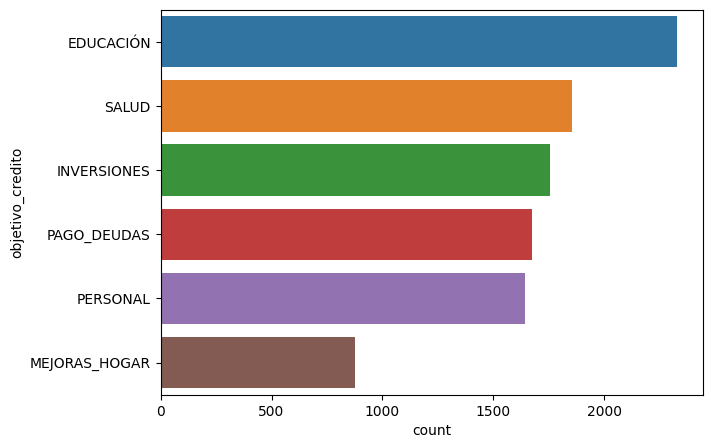

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(y=df_creditos['objetivo_credito'], order=df_creditos['objetivo_credito'].value_counts().index)
plt.show()